In [106]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
url = 'https://rocketjobs.pl/widelki_tak'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html5lib')

url = "https://rocketjobs.pl/wszystkie-lokalizacje/{typ}/{doswiadczenie}/widelki_tak";

typ= {"marketing", "sales","finanse","inzynieria","design","hr" }
doswiadczenie = {"doswiadczenie_staz-junior", "doswiadczenie_specjalista-mid", "doswiadczenie_starszy-specjalista-senior", "doswiadczenie_manager-c-level"}

In [98]:
def price_range_to_integers(price):
    return int(price.replace(" ",""))

dictionary = {}

for typPracy in typ:
    for dosw in doswiadczenie:
        page = requests.get(("https://rocketjobs.pl/wszystkie-lokalizacje/{}/{}/widelki_tak").format(typPracy,dosw))
        soup = BeautifulSoup(page.content, 'html5lib')
        offers = soup.find_all(class_='MuiBox-root css-6vg4fr')
        job_offers.clear()
        for offer in offers:
            job_name = offer.find('h2', class_='css-g9dzcj').get_text()
            price_range = re.findall(r'\d+\s\d+', offer.find(class_='css-lz8wxo').get_text())
            price_low = price_range_to_integers(price_range[0])
            try:
                price_up = price_range_to_integers(price_range[1])
            except IndexError:
                price_up =  0
            job_offers.append({'jobName': job_name, 'price_low':price_low,'price_high':price_up})
            key = typPracy +"/"+ dosw
            value = pd.DataFrame(job_offers)
            dictionary[key] = value 

In [165]:
priceFinanse = []

for item in dictionary.keys():
    for dosw in doswiadczenie:
        print(dosw)
        if (item.split("/")[0] == "finanse" and item.split("/")[1] == dosw):
            priceFinanse.append(dictionary[item]["price_low"].mean())
print(priceFinanse)

doswiadczenie_starszy-specjalista-senior
doswiadczenie_specjalista-mid
doswiadczenie_manager-c-level
doswiadczenie_staz-junior
doswiadczenie_starszy-specjalista-senior
doswiadczenie_specjalista-mid
doswiadczenie_manager-c-level
doswiadczenie_staz-junior
doswiadczenie_starszy-specjalista-senior
doswiadczenie_specjalista-mid
doswiadczenie_manager-c-level
doswiadczenie_staz-junior
doswiadczenie_starszy-specjalista-senior
doswiadczenie_specjalista-mid
doswiadczenie_manager-c-level
doswiadczenie_staz-junior
doswiadczenie_starszy-specjalista-senior
doswiadczenie_specjalista-mid
doswiadczenie_manager-c-level
doswiadczenie_staz-junior
doswiadczenie_starszy-specjalista-senior
doswiadczenie_specjalista-mid
doswiadczenie_manager-c-level
doswiadczenie_staz-junior
doswiadczenie_starszy-specjalista-senior
doswiadczenie_specjalista-mid
doswiadczenie_manager-c-level
doswiadczenie_staz-junior
doswiadczenie_starszy-specjalista-senior
doswiadczenie_specjalista-mid
doswiadczenie_manager-c-level
doswiadcze

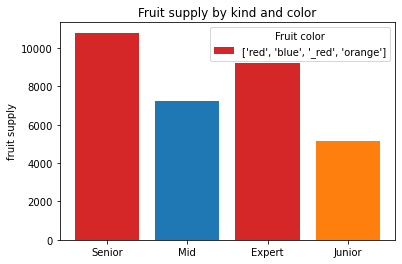

In [166]:
fig, ax = plt.subplots()

fruits = ['Senior', 'Mid', 'Expert', 'Junior']
counts = priceFinanse

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()